<a href="https://colab.research.google.com/github/ssc141/BTE-320/blob/main/PandasAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis assignment (20 points)

You have been given the dataset `travel-times` in a CSV format. This dataset comes from a driver that uses an app to track GPS coordinates as he drives to work and back each day. The app collects the location and elevation data. In total, data for about 200 trips are summarized in this data set.

Load the `travel-times` in a `df` variable using `pandas` and then perform the following:
- print the shape of the dataset **(1 points)**
- print the first 15 rows of the dataset **(1 points)**
- get information for the features (columns) with missing values **(1 points)**
- drop duplicate values (if any) by keeping only the last instance **(1 points)**
- calculate the total number of missing values (if any) on each column **(2 points)**
- create two copies of the dataframe, and then:
    - drop rows with missing values from the 1st copy **(1 points)**
    - drop columns with missing values from the 2nd copy **(1 points)**
- get summary statistics and see the correlation between the numerical columns **(1 points)**
- show rows 11 to 14 **(1 points)**
- create a subset with trips occurred on November 23, 2011 and January 6, 2012 **(2 points)**
- produce a scatterplot between `Distance` and `TotalTime` **(1 points)**
    * Use:
```python
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
```
- produce boxplots for `AvgSpeed` and `AvgMovingSpeed` (use different cells for each) **(2 points)**

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

In [32]:
df = pd.read_csv('travel-times.csv')


df['Date'] = pd.to_datetime(df['Date'])
df['StartTime'] = pd.to_datetime(df['StartTime'], format='%H:%M').dt.time
numeric_df = df.select_dtypes(include=[np.number])

In [23]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (205, 13)


In [24]:
print("First 15 rows of the dataset:")
print(df.head(15))

First 15 rows of the dataset:
         Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
0  2012-01-06     16:37     Friday    Home     51.29     127.4      78.3   
1  2012-01-06     08:20     Friday     GSK     51.63     130.3      81.8   
2  2012-01-04     16:17  Wednesday    Home     51.27     127.4      82.0   
3  2012-01-04     07:53  Wednesday     GSK     49.17     132.3      74.2   
4  2012-01-03     18:57    Tuesday    Home     51.15     136.2      83.4   
5  2012-01-03     07:57    Tuesday     GSK     51.80     135.8      84.5   
6  2012-01-02     17:31     Monday    Home     51.37     123.2      82.9   
7  2012-01-02     07:34     Monday     GSK     49.01     128.3      77.5   
8  2011-12-23     08:01     Friday     GSK     52.91     130.3      80.9   
9  2011-12-22     17:19   Thursday    Home     51.17     122.3      70.6   
10 2011-12-22     08:16   Thursday     GSK     49.15     129.4      74.0   
11 2011-12-21     07:45  Wednesday     GSK     51.77     1

In [25]:
print("Features with missing values:")
print(df.isna().sum()[df.isna().sum() > 0])


Features with missing values:
FuelEconomy     17
Comments       181
dtype: int64


In [26]:
df = df.drop_duplicates(keep='last')

In [27]:
print("Number of missing values per column:")
print(df.isna().sum())

Number of missing values per column:
Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64


In [28]:
df1 = df.copy()
df2 = df.copy()

In [29]:
df1.dropna(inplace=True)

In [30]:
df2.dropna(axis=1, inplace=True)

In [41]:
print("Summary statistics:")
print(df.describe())

print("Correlation between numerical columns:")
print(df.select_dtypes(exclude='object').corr())

Summary statistics:
                                Date    Distance    MaxSpeed    AvgSpeed  \
count                            205  205.000000  205.000000  205.000000   
mean   2011-10-05 03:16:40.975609856   50.981512  127.591707   74.477561   
min              2011-07-11 00:00:00   48.320000  112.200000   38.100000   
25%              2011-08-22 00:00:00   50.650000  124.900000   68.900000   
50%              2011-10-04 00:00:00   51.140000  127.400000   73.600000   
75%              2011-11-17 00:00:00   51.630000  129.800000   79.900000   
max              2012-01-06 00:00:00   60.320000  140.900000  107.700000   
std                              NaN    1.321205    4.128450   11.409816   

       AvgMovingSpeed   TotalTime  MovingTime  
count      205.000000  205.000000  205.000000  
mean        81.975610   41.904390   37.871707  
min         50.300000   28.200000   27.100000  
25%         76.600000   38.400000   35.700000  
50%         81.400000   41.300000   37.600000  
75%    

In [34]:
print("Rows 11 to 14:")
print(df.iloc[10:14])

Rows 11 to 14:
         Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
10 2011-12-22  08:16:00   Thursday     GSK     49.15     129.4      74.0   
11 2011-12-21  07:45:00  Wednesday     GSK     51.77     124.8      71.7   
12 2011-12-20  16:05:00    Tuesday    Home     51.45     130.1      75.2   
13 2011-12-20  06:04:00    Tuesday     GSK     49.01     119.0      77.4   

    AvgMovingSpeed FuelEconomy  TotalTime  MovingTime Take407All Comments  
10            81.4        8.89       39.8        36.2         No      NaN  
11            78.9        8.89       43.3        39.4         No      NaN  
12            82.7        8.89       41.1        37.3         No      NaN  
13            82.0        8.89       38.0        35.9         No      NaN  


In [35]:
subset_dates = ['11/23/2011', '1/6/2012']
subset = df[df['Date'].isin(subset_dates)]
print("Subset for specific dates:")
print(subset)

Subset for specific dates:
         Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
0  2012-01-06  16:37:00     Friday    Home     51.29     127.4      78.3   
1  2012-01-06  08:20:00     Friday     GSK     51.63     130.3      81.8   
44 2011-11-23  16:17:00  Wednesday    Home     60.32     129.4      68.9   
45 2011-11-23  07:22:00  Wednesday     GSK     51.60     126.4      67.3   

    AvgMovingSpeed FuelEconomy  TotalTime  MovingTime Take407All Comments  
0             84.8         NaN       39.3        36.3         No      NaN  
1             88.9         NaN       37.9        34.9         No      NaN  
44            74.6         9.3       52.5        48.5         No      NaN  
45            73.6         9.3       46.0        42.1         No      NaN  


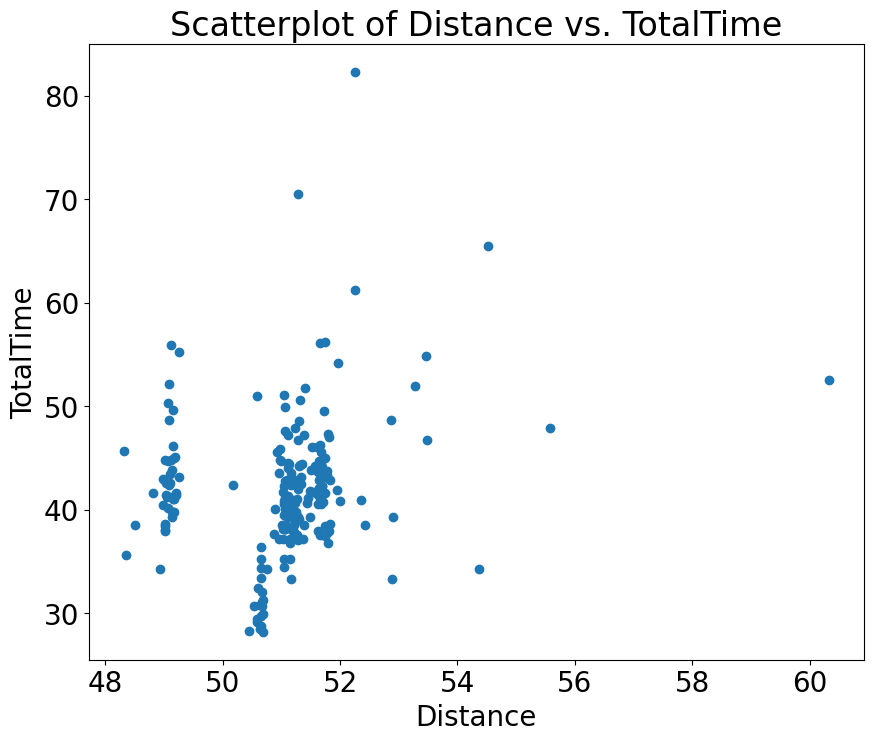

In [36]:
plt.scatter(df['Distance'], df['TotalTime'])
plt.xlabel('Distance')
plt.ylabel('TotalTime')
plt.title('Scatterplot of Distance vs. TotalTime')
plt.show()

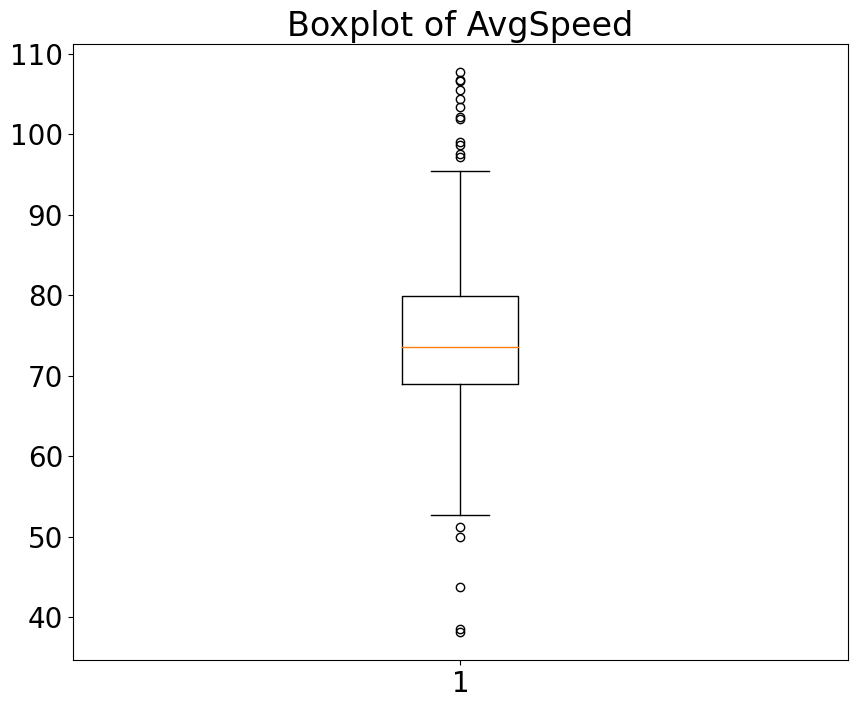

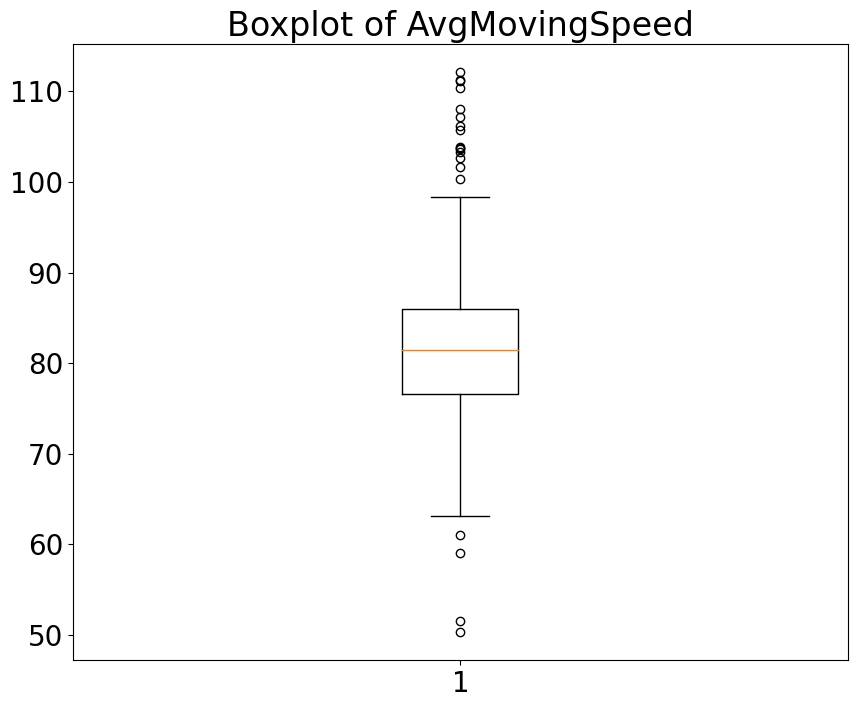

In [37]:
plt.boxplot(df['AvgSpeed'].dropna())
plt.title('Boxplot of AvgSpeed')
plt.show()

plt.boxplot(df['AvgMovingSpeed'].dropna())
plt.title('Boxplot of AvgMovingSpeed')
plt.show()